<a href="https://colab.research.google.com/github/dbuckman17/TIPC-Portfolio-Construction-Code/blob/main/Final_Documented_Code_to_Calculate_and_Append_Risk_and_Liquidity_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Data Preparation

The data preparation step involves setting up the loss data and filtering it to focus on negative losses, which represent downside risk.

## How to Run:
1. Upload your CSV file to Google Colab:
   - Click on the "Files" tab on the left sidebar.
   - Click the "Upload" button and select your CSV file.

2. Update the file path in the `main` function:
   - Replace `'your_file_path.csv'` in the `main('your_file_path.csv')` line with the path to your uploaded CSV file.
   - For example, if you upload `fund_data.csv`, the line should be `main('/content/fund_data.csv')`.

3. Run the Code:
   - Click on the "Runtime" menu at the top.
   - Select "Run all" to execute the entire script.

4. Download the Output File:
   - After the code has run, a new CSV file will be created with `_with_risk_metrics` appended to the filename. This sometimes takes a minute to show up.
   - You can download this file by clicking on the "Files" tab, right-clicking on the new file, and selecting "Download".

Note: Ensure that all necessary Python packages (e.g., pandas, numpy, scipy) are installed in your Colab environment. You can install them using:
!pip install {pandas numpy scipy}


### Detailed Steps:
1. **Original Loss Data**:
   ```python
   loss_data = np.array([
       0.0, -111.5, -20.7, -2.0, -1.5, -2.5, 0.0, 0.0, -22.0, -7.9, 0.0,
       0.0, 0.0, 0.0, -15.0, 0.0, 0.0, 0.0, 0.0
   ])
   ```
   - The loss data is provided as a numpy array containing both positive and negative values.
   - We will focus on the negative values to analyze downside risk.

2. **Filter Negative Loss Data**:
   ```python
   negative_loss_data = loss_data[loss_data < 0]
   ```
   - We filter the loss data to keep only negative values.
   - These negative values represent losses that we are interested in for risk assessment.
    

In [ ]:

import numpy as np

# Original loss data
loss_data = np.array([
    0.0, -111.5, -20.7, -2.0, -1.5, -2.5, 0.0, 0.0, -22.0, -7.9, 0.0,
    0.0, 0.0, 0.0, -15.0, 0.0, 0.0, 0.0, 0.0
])

# Filter negative data
negative_loss_data = loss_data[loss_data < 0]



## t-Distribution Fitting

The notebook calculates a t-distribution based on the negative loss data, assuming perfect correlation between assets for simplicity and conservatism.

### Detailed Steps:
1. **Calculate Distribution Parameters**:
   - **Mean**:
     ```python
     mean = np.mean(negative_loss_data)
     ```
     - Calculate the mean of the negative loss data.
   - **Standard Deviation**:
     ```python
     std_dev = np.std(negative_loss_data, ddof=1)
     ```
     - Calculate the sample standard deviation of the negative loss data.
   - **Degrees of Freedom**:
     ```python
     df = len(negative_loss_data) - 1
     ```
     - Calculate the degrees of freedom based on the sample size.

2. **Fit the t-Distribution**:
   ```python
   t_dist = t(df, loc=mean, scale=std_dev)
   ```
   - Fit the t-distribution using the calculated parameters.
    

In [ ]:

from scipy.stats import t

# Calculate parameters
mean = np.mean(negative_loss_data)
std_dev = np.std(negative_loss_data, ddof=1)
df = len(negative_loss_data) - 1

# Generate the t-distribution
t_dist = t(df, loc=mean, scale=std_dev)



## Plotting the Distribution

This section visualizes the fitted t-distribution over the histogram of the actual loss data, providing a visual comparison of the model fit.

### Detailed Steps:
1. **Plot the Histogram**:
   ```python
   plt.hist(negative_loss_data, bins=10, density=True, alpha=0.6, color='g', label='Loss Data Histogram')
   ```
   - Create a histogram of the negative loss data to visualize the distribution of losses.

2. **Plot the t-Distribution**:
   ```python
   x = np.linspace(-111.5, 0, 1000)
   pdf = t_dist.pdf(x)
   plt.plot(x, pdf, 'r-', lw=2, label='Fitted t-Distribution')
   ```
   - Plot the probability density function (PDF) of the fitted t-distribution over the histogram.

3. **Customize the Plot**:
   ```python
   plt.title('Fitted t-Distribution vs. Loss Data Histogram')
   plt.xlabel('Loss')
   plt.ylabel('Density')
   plt.legend()
   ```
   - Add a title, labels, and a legend to the plot to make it more informative.

4. **Display the Plot**:
   ```python
   plt.show()
   ```
   - Display the final plot.
    

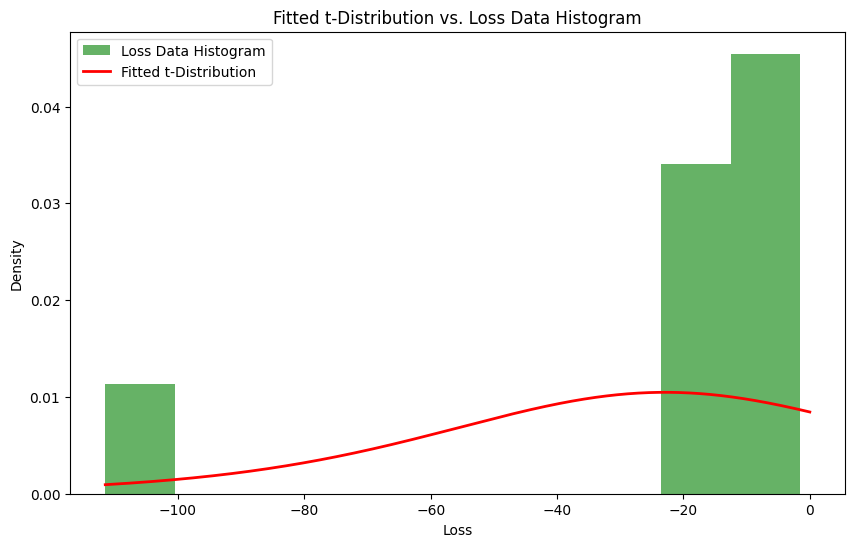

In [ ]:

import matplotlib.pyplot as plt

# Plot the histogram of the loss data and overlay the t-distribution
plt.figure(figsize=(10, 6))

# Plot the histogram of the loss data
plt.hist(negative_loss_data, bins=10, density=True, alpha=0.6, color='g', label='Loss Data Histogram')

# Plot the t-distribution
x = np.linspace(-111.5, 0, 1000)
pdf = t_dist.pdf(x)
plt.plot(x, pdf, 'r-', lw=2, label='Fitted t-Distribution')

# Titles and labels
plt.title('Fitted t-Distribution vs. Loss Data Histogram')
plt.xlabel('Loss')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()



## Generate CDF Table

This section generates a table of cumulative distribution function (CDF) values for the fitted t-distribution, which helps in understanding the distribution of losses.

### Detailed Steps:
1. **Generate CDF Values**:
   ```python
   x_values = np.linspace(-111.5, 0, 100)
   cdf_values = t_dist.cdf(x_values)
   ```
   - Calculate the CDF values of the fitted t-distribution for a range of loss values.

2. **Create a DataFrame**:
   ```python
   cdf_table = pd.DataFrame({
       'Value': x_values,
       'CDF': cdf_values
   })
   ```
   - Store the CDF values in a pandas DataFrame for easy viewing and manipulation.

3. **Display the CDF Table**:
   ```python
   print("
CDF Table:")
   print(cdf_table.head())
   ```
   - Print the first few rows of the CDF table to the console.
    

In [ ]:

import pandas as pd

# Generate CDF Table for the Updated Student-t Distribution
x_values = np.linspace(-111.5, 0, 100)
cdf_values = t_dist.cdf(x_values)

cdf_table = pd.DataFrame({
    'Value': x_values,
    'CDF': cdf_values
})

print("\nCDF Table:")
print(cdf_table.head())



CDF Table:
        Value       CDF
0 -111.500000  0.023345
1 -110.373737  0.024420
2 -109.247475  0.025546
3 -108.121212  0.026725
4 -106.994949  0.027960



## Risk Metrics Calculation

The function `calculate_loss_percentiles_student_t` computes `1 in 10` and `1 in 100` loss metrics using the fitted t-distribution. These metrics are important for understanding potential extreme losses.

### Detailed Steps:
1. **Map Risk Levels to CDF Values**:
   ```python
   cdf_map_10 = {5: 0.10, 4: 0.30, 3: 0.50, 2: 0.70, 1: 0.90}
   cdf_map_100 = {5: 0.01, 4: 0.21, 3: 0.41, 2: 0.61, 1: 0.81}
   ```
   - Define mappings from risk ratings (1-5) to cumulative distribution function (CDF) values for 1 in 10 and 1 in 100 losses.

2. **Calculate Percentile Losses**:
   ```python
    loss_10 = max(min(t_dist.ppf(cdf_map_10[risk_rating])/100, 0), -1)
    loss_100 = max(min(t_dist.ppf(cdf_map_100[risk_rating])/100, 0), -1)
   ```
   - Use the inverse CDF function (`ppf`) of the t-distribution to calculate the loss percentiles.
   - Ensure that the calculated losses are bounded between -1 and 0, representing losses.

3. **Inversion and Scaling**:
   ```python
   scaled_loss_10 = float(-loss_10)
   scaled_loss_100 = float(-loss_100)
   ```
   - Convert the loss values to positive by multiplying by -1.    

In [ ]:

def calculate_loss_percentiles_student_t(risk_rating):
    cdf_map_10 = {5: 0.10, 4: 0.30, 3: 0.50, 2: 0.70, 1: 0.90}
    cdf_map_100 = {5: 0.01, 4: 0.21, 3: 0.41, 2: 0.61, 1: 0.81}

    loss_10 = (min(t_dist.ppf(cdf_map_10[risk_rating])/100, 0))
    loss_100 = (min(t_dist.ppf(cdf_map_100[risk_rating])/100, 0))

    scaled_loss_10 = float(-loss_10)
    scaled_loss_100 = float(-loss_100)

    return scaled_loss_10, scaled_loss_100



## Drawdown Metrics Calculation and Display

This code calculates drawdown metrics (`1 in 10 Loss` and `1 in 100 Loss`) for various risk levels using the `calculate_loss_percentiles_student_t` function. The results are stored and displayed in a table.

### Assumption:
- **Drawdown is Agnostic to Asset Class**: The drawdown calculations are independent of asset classes. If specific asset class considerations are needed, modifications should be made to the risk level analysis.



### Detailed Steps:

1. **Define Risk Levels**:
   ```python
   risk_levels = [1, 2, 3, 4, 5]
   ```
   - We define a list of risk levels (from 1 to 5) to evaluate. Each risk level represents a different degree of risk exposure.


In [ ]:

# Define Risk Levels
risk_levels = [1, 2, 3, 4, 5]



2. **Prepare Results List**:
   ```python
   results = []
   ```
   - We initialize an empty list named `results` to store the calculated drawdown metrics for each risk level.


In [ ]:

# Prepare Results List
results = []



3. **Calculate Drawdown Metrics for Each Risk Level**:
   ```python
   for risk_level in risk_levels:
       loss_10, loss_100 = calculate_loss_percentiles_student_t(risk_level)
       results.append({
           'Risk Level': risk_level,
           '1 in 10 Loss': loss_10,
           '1 in 100 Loss': loss_100
       })
   ```
   - We loop through each risk level in `risk_levels`.
   - For each `risk_level`, we use the `calculate_loss_percentiles_student_t` function to calculate the `1 in 10 Loss` and `1 in 100 Loss` metrics.
   - The calculated metrics are stored in a dictionary and appended to the `results` list.


In [ ]:

# Calculate Drawdown Metrics for Each Risk Level
for risk_level in risk_levels:
    loss_10, loss_100 = calculate_loss_percentiles_student_t(risk_level)
    results.append({
        'Risk Level': risk_level,
        '1 in 10 Loss': loss_10,
        '1 in 100 Loss': loss_100
    })



4. **Convert Results to DataFrame**:
   ```python
   loss_table = pd.DataFrame(results)
   ```
   - We convert the `results` list into a pandas DataFrame called `loss_table` for better readability and easier manipulation.


In [ ]:

# Convert Results to DataFrame
loss_table = pd.DataFrame(results)



5. **Display the Results Table**:
   ```python
   print(loss_table)
   ```
   - Finally, we print the `loss_table` DataFrame to display the calculated drawdown metrics for each risk level.


In [ ]:

# Display the Results Table. These values are net of base case assumptions.
#However, we cap stressed losses at 0, so no assets return above principal in a stress.
print(loss_table)


   Risk Level  1 in 10 Loss  1 in 100 Loss
0           1      0.000000       0.000000
1           2      0.027077       0.122191
2           3      0.228875       0.315698
3           4      0.430673       0.543690
4           5      0.748860       1.330623



## DataFrame Updates

The `append_risk_metrics` function adds the calculated risk metrics to the DataFrame, enriching the data with valuable risk insights.

### Detailed Steps:
1. **Initialize Columns**:
   ```python
   fund_data['1 in 10 Loss'] = np.nan
   fund_data['1 in 100 Loss'] = np.nan
   ```
   - Create two new columns in the DataFrame for `1 in 10 Loss` and `1 in 100 Loss`.
   - These columns are initialized with NaN values.

2. **Iterate Through Rows**:
   ```python
   for idx, row in fund_data.iterrows():
       risk_level = int(row['Risk of loss'])
       loss_10, loss_100 = calculate_loss_percentiles_student_t(risk_level)
       fund_data.at[idx, '1 in 10 Loss'] = loss_10
       fund_data.at[idx, '1 in 100 Loss'] = loss_100
   ```
   - For each row in the DataFrame, extract the risk rating and calculate the corresponding loss percentiles.
   - Update the DataFrame with the calculated `1 in 10 Loss` and `1 in 100 Loss` values.
    

In [ ]:
def append_risk_metrics(fund_data):
    fund_data['1 in 10 Loss'] = np.nan
    fund_data['1 in 100 Loss'] = np.nan

    for idx, row in fund_data.iterrows():
        risk_level = int(row['Risk of loss'])
        loss_10, loss_100 = calculate_loss_percentiles_student_t(risk_level)

        # **Subtract the Target net IRR (%) from loss_10 and loss_100 as all losses in data file are net of base IRR**
        # Adjust the losses and ensure the values are within the range of 0 to -1
        loss_10_adjusted = min(1, max(0, loss_10 - row['Target net IRR (%)']))
        loss_100_adjusted = min(1, max(0, loss_100 - row['Target net IRR (%)']))

        # **Store the adjusted values in the DataFrame**
        fund_data.at[idx, '1 in 10 Loss'] = loss_10_adjusted
        fund_data.at[idx, '1 in 100 Loss'] = loss_100_adjusted

    return fund_data


## Main Function

The `main` function orchestrates the workflow by loading the data, calculating risk metrics, and saving the updated results.

### Detailed Steps:
1. **Load Data**:
   ```python
   fund_data = pd.read_csv(file_path)
   ```
   - Load the fund data from the specified CSV file.

2. **Calculate and Append Risk Metrics**:
   ```python
   updated_fund_data = append_risk_metrics(fund_data)
   ```
   - Use the `append_risk_metrics` function to calculate and append the risk metrics to the DataFrame.

3. **Save Updated Data**:
   ```python
   output_file_path = file_path.replace('.csv', '_with_risk_metrics.csv')
   updated_fund_data.to_csv(output_file_path, index=False)
   ```
   - Save the updated DataFrame to a new CSV file with `_with_risk_metrics` appended to the original filename.
    

In [ ]:

import pandas as pd

def main(file_path):
    try:
        fund_data = pd.read_csv(file_path)
        updated_fund_data = append_risk_metrics(fund_data)
        output_file_path = file_path.replace('.csv', '_with_risk_metrics.csv')
        updated_fund_data.to_csv(output_file_path, index=False)

        print(f"File saved as: {output_file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main('finalized_backend_fund_data.csv')


File saved as: finalized_backend_fund_data_with_risk_metrics.csv
